In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\mrhar\Desktop\ml\data\csv\basketball_stat.csv')

In [3]:
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


### 분류할 레이블 살펴보기

In [4]:
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

## 1. 데이터 시각화
레이블 분류와 상관 없는 속성 삭제를 위한 근거 마련

가설 : 2점슛, 어시스트, 스틸 속성은 센터(C)와 슈팅가드(SG)를 구분 하는 데 불필요

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

스틸, 2점슛 데이터 시각화

Text(0.5, 1.0, 'STL and 2P in 2d plane')

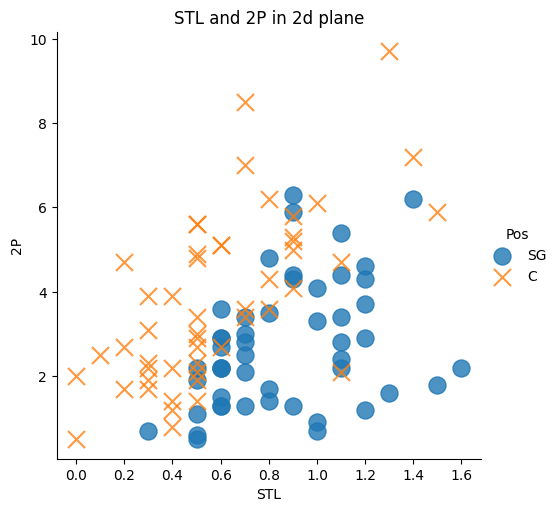

In [12]:
sns.lmplot(data = df, 
           x = 'STL',
           y = '2P',
           hue = 'Pos',
          fit_reg = False, # 노 라인
          scatter_kws = {"s":150}, #좌표 상 점의 크기
          markers = ["o", 'x']) 

plt.title('STL and 2P in 2d plane')

Text(0.5, 1.0, 'STL and 2P in 2d plane')

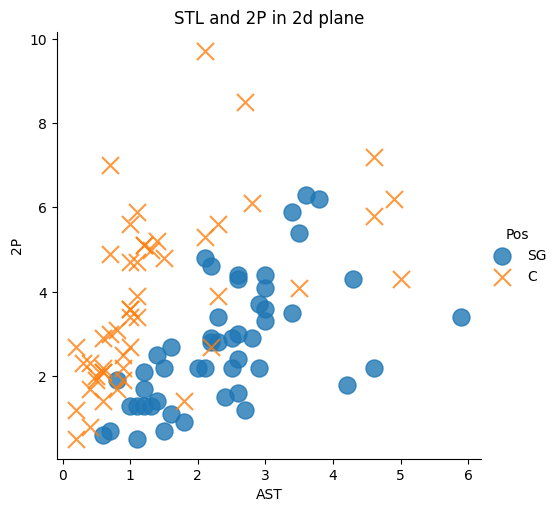

In [14]:
sns.lmplot(data = df, 
           x = 'AST',
           y = '2P',
           hue = 'Pos',
          fit_reg = False, # 노 라인
          scatter_kws = {"s":150}, #좌표 상 점의 크기
          markers = ["o", 'x']) 

plt.title('AST and 2P in 2d plane')

=> 2점슛, 어시스트, 스틸의 속성으로 데이터를 분포시킬 경우 슈팅 가드와 센터의 경계가 모호함

3블로킹, 3점슛 데이터 시각화

Text(0.5, 1.0, 'STL and 2P in 2d plane')

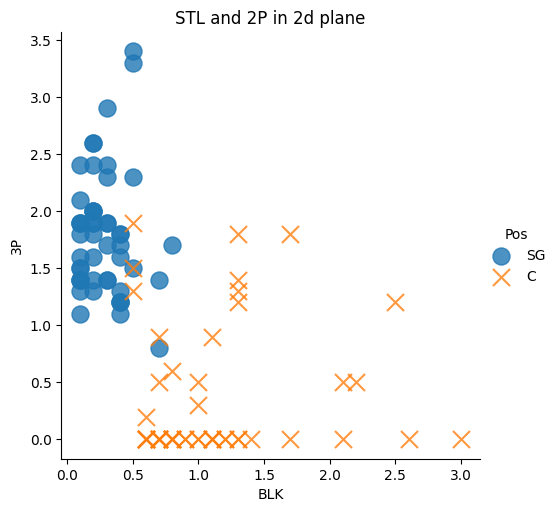

In [15]:
sns.lmplot(data = df, 
           x = 'BLK',
           y = '3P',
           hue = 'Pos',
          fit_reg = False, # 노 라인
          scatter_kws = {"s":150}, #좌표 상 점의 크기
          markers = ["o", 'x']) 

plt.title('BLK and 3P in 2d plane')

Text(0.5, 1.0, 'TRB and 3P in 2d plane')

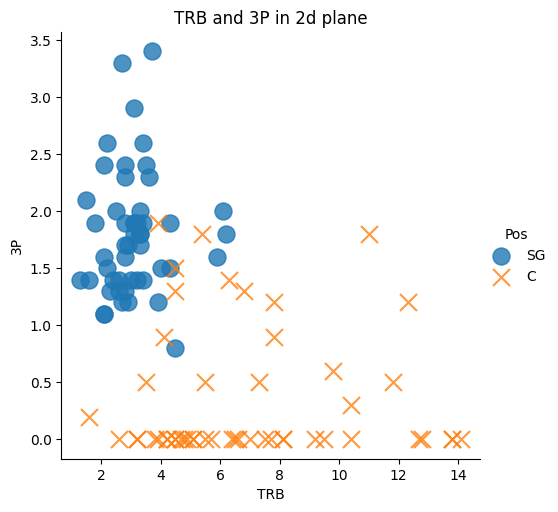

In [16]:
sns.lmplot(data = df, 
           x = 'TRB',
           y = '3P',
           hue = 'Pos',
          fit_reg = False, # 노 라인
          scatter_kws = {"s":150}, #좌표 상 점의 크기
          markers = ["o", 'x']) 

plt.title('TRB and 3P in 2d plane')

=> 슈팅가드와 센터의 경계가 명확함

## 2. 데이터 다듬기

In [17]:
df.drop(['2P', 'AST', 'STL'], axis = 1, inplace = True)

In [18]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


## 3. 데이터 나누기 - train/test

In [19]:
from sklearn.model_selection import train_test_split

In [36]:
train, test = train_test_split(df, test_size = 0.2)
#train data 80%, test data 20%

In [37]:
train.shape[0]

80

In [38]:
test.shape[0]

20

## 4. 최적의 kNN 파라미터 k 찾기

검증 데이터를 사용해 가장 예측율이 높은 k를 찾음

사이킷런의 cross_val_score를 사용하면
kNN 모델의 교차 검증(cross validation) 가능
<br>
-> k-fold 교차 검증 사용

1. 학습 데이터를 10개의 조각으로 나누고, 10번의 검증 시행
2. 같은 검증 과정을 k=3부터 학습 데이터 절반의 크기까지 수행

In [23]:
#kNN 라이브러리 추가
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [39]:
#최적의 k를 찾기 위해 교차 검증을 수행할 k의 범위를 3부터 학습
max_k_range = train.shape[0]//2
k_list = []
for i in range(3, max_k_range, 2):
    k_list.append(i)

cross_validation_scores = [] #k의 검증 결과 점수를 저장함
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

#교차 검증(10-fold)을 각 k를 대상으로 수행해 검증 결과를 저장
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(),
                            cv = 10, scoring = 'accuracy')
    cross_validation_scores.append(scores.mean())

cross_validation_scores                      

[0.925,
 0.9125,
 0.925,
 0.925,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.8875,
 0.8625,
 0.8625,
 0.8625,
 0.8625,
 0.825,
 0.825,
 0.7875,
 0.7625,
 0.7625]

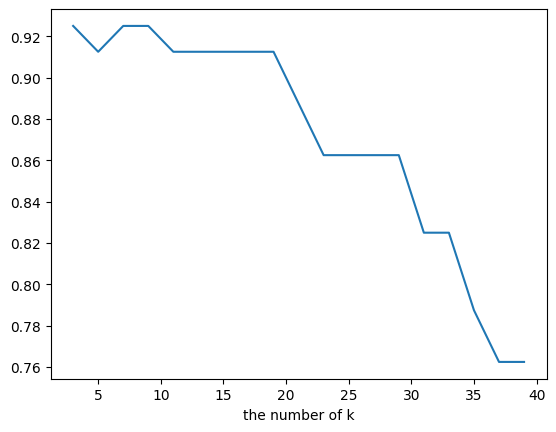

In [40]:
#k에 따른 정확도를 시각화
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.show('Accuracy')

시각화를 통해 최적의 k가 3인 것을 알 수 있음

In [34]:
#가장 예측율이 높은 k를 선정
k = k_list[cross_validation_scores.index(max(cross_validation_scores))]
print("The best number of k : " + str(k))

The best number of k : 3


## 5. 모델 테스트

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors = k)

In [42]:
#학습에 사용될 속성을 지정
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

In [43]:
#kNN 모델 학습
knn.fit(x_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=39)

In [44]:
#테스트 데이터에서 분류를 위해 사용될 속성을 지정
x_test = test[['3P', 'BLK', 'TRB']]
#선수 포지션에 대한 정답을 지정
y_test = test[['Pos']]

In [45]:
#테스트 시작
pred = knn.predict(x_test)

In [46]:
#모델 예측 정확도(accuracy) 출력
print("accuracy : " + str(accuracy_score(y_test.values.ravel(), pred)))

accuracy : 0.9


In [48]:
comparison = pd.DataFrame({'prediction':pred, 
                          'ground_truth' : y_test.values.ravel()})

In [49]:
comparison

,prediction,ground_truth
0,SG,SG
1,SG,SG
2,SG,SG
3,SG,SG
4,C,C
5,SG,SG
6,SG,SG
7,C,C
8,C,C
9,C,C
